In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
## Reading csv files
def read_file(filename):
    file_open = open(filename,"r")
    data_array = []
    for line in iter(file_open):
        if line.find("Current") != -1:
            continue
        line_no_newline = line.rstrip()
        line_split = line_no_newline.split(",")
        time1 = int(line_split[0])
        current = float(line_split[1])
        concat = [time1,current]
        data_array.append(concat)
    return data_array

In [3]:
time_current_data = read_file("data_akbilgic.csv")

ValueError: invalid literal for int() with base 10: '\ufeffdate'

In [4]:
time_current_data[0:2]

[[0, 11.825], [317, 11.797]]

In [5]:
X = [] # time, 161 readings
y = [] # I -- reading from csv file
for kk in range(0,len(time_current_data)):
    X.append(time_current_data[kk][0])
    y.append(time_current_data[kk][1])

In [6]:
print(X)

[0, 317, 652, 972, 1309, 1631, 1991, 2312, 2647, 2967, 3304, 3625, 3961, 4282, 4617, 4939, 5274, 5604, 5941, 6262, 6597, 6919, 7255, 7582, 7917, 8240, 8575, 8897, 9232, 9553, 9903, 10224, 10559, 10881, 11215, 11537, 11872, 12199, 12532, 12852, 13191, 13511, 13847, 14167, 14501, 14821, 15154, 15474, 15810, 16131, 16467, 16787, 17118, 17439, 17773, 18101, 18433, 18753, 19085, 19406, 19738, 20059, 20390, 20710, 21041, 21362, 21695, 22015, 22352, 22673, 23004, 23327, 23661, 23984, 24317, 24648, 24983, 25304, 25636, 25957, 26310, 26631, 26964, 27284, 27615, 27957, 28289, 28610, 28941, 29261, 29594, 29922, 30253, 30574, 30905, 31250, 31581, 31901, 32233, 32555, 32887, 33208, 33540, 33860, 34191, 34511, 34845, 35166, 35520, 35840, 36175, 36495, 36827, 37147, 37478, 37815, 38146, 38465, 38797, 39117, 39454, 39823, 40138, 40553, 40877, 41289, 41609, 42021, 42345, 42758, 43078, 43490, 43809, 44221, 44542, 44956, 45277, 45708, 46029, 46442, 46764, 47176, 47498, 47910, 48231, 48642, 48971, 49388, 

In [7]:
print(y)

[11.825, 11.797, 11.805, 11.784, 11.783, 11.779, 11.788, 11.78, 11.702, 11.757, 11.738, 11.746, 11.762, 11.666, 11.726, 11.686, 11.698, 11.72, 11.633, 11.693, 11.67, 11.645, 11.686, 11.608, 11.665, 11.663, 11.617, 11.661, 11.59, 11.631, 11.651, 11.576, 11.617, 11.596, 11.622, 11.628, 11.575, 11.577, 11.608, 11.601, 11.602, 11.583, 11.573, 11.608, 11.589, 11.597, 11.589, 11.54, 11.604, 11.527, 11.573, 11.565, 11.491, 11.59, 11.522, 11.557, 11.577, 11.43, 11.597, 11.429, 11.55, 11.55, 11.431, 11.572, 11.39, 11.521, 11.465, 11.407, 11.572, 11.293, 11.549, 11.396, 11.433, 11.52, 11.31, 11.534, 11.35, 11.397, 11.497, 11.278, 11.516, 11.227, 11.379, 11.367, 11.152, 11.462, 11.137, 11.391, 11.268, 11.165, 11.419, 11.06, 11.404, 11.069, 11.217, 11.287, 11.054, 11.38, 10.973, 11.215, 11.117, 11.036, 11.334, 10.85, 11.318, 10.889, 11.084, 11.115, 10.89, 11.271, 10.752, 11.184, 10.985, 10.979, 11.166, 10.737, 11.235, 10.761, 11.054, 10.985, 10.815, 11.18, 10.599, 10.842, 11.1, 10.641, 10.983, 10.

In [8]:
# Polynomial fit using Numpy
Order = 4
fit = np.polyfit(X,y,Order)
print("Coeff ", fit)
fit1 = np.poly1d(fit,variable="t")
print(fit1)
y1 = fit1(X)

Coeff  [ 5.79028479e-19 -6.05337486e-14  1.64371633e-09 -2.92101235e-05
  1.18137491e+01]
          4             3             2
5.79e-19 t - 6.053e-14 t + 1.644e-09 t - 2.921e-05 t + 11.81


In [22]:
# Equation
# I(t) = 5.79e-19xt**4 - 6.053e-14xt**3 + 1.644e-09xt**2 - 2.921e-05xt + 11.81 

In [9]:
# Using polynomial equation, find the value of I for time interval of 5 seconds
y_calculated = []
for val in range(0,54130,5):
    y_calculated.append(fit1(val))  

In [10]:
# print to check
print(y_calculated[0:5])
print(len(y_calculated))
print(len(X))

[11.813749139771044, 11.813603130238985, 11.813457202847346, 11.81331135755074, 11.81316559430379]
10826
161


In [11]:
# create list of nums; 54129 is the last time in current readings, step value of 5 seconds
nums = []
for kk in range(0,54130,5):
    nums.append(kk)

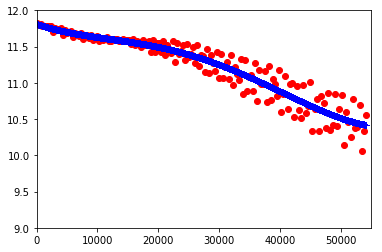

In [12]:
plt.plot(X,y,'ro')
plt.plot(nums,y_calculated,'b+')
plt.axis([0,55000,9,12])
plt.show()

In [13]:
# OK, now predict values for 50000 and 60000
print(fit1(50000))
print(fit1(60000))

10.514743214759827
10.407439918603144


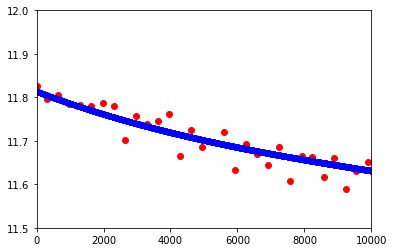

In [14]:
# Zoom in to see details
plt.plot(X,y,'ro')
plt.plot(nums,y_calculated,'b+')
plt.axis([0,10000,11.5,12])
plt.show()